In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape

(456548, 9)

In [4]:
test.shape

(32573, 8)

In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [7]:
# drop colummn
train.drop(columns=["id","emailer_for_promotion","homepage_featured"], inplace=True)

In [8]:
test.drop(columns=["id","emailer_for_promotion","homepage_featured"], inplace=True)

In [9]:
train.head()

,week,center_id,meal_id,checkout_price,base_price,num_orders
0,1,55,1885,136.83,152.29,177
1,1,55,1993,136.83,135.83,270
2,1,55,2539,134.86,135.86,189
3,1,55,2139,339.50,437.53,54
4,1,55,2631,243.50,242.50,40


In [10]:
test.head()

,week,center_id,meal_id,checkout_price,base_price
0,146,55,1885,158.11,159.11
1,146,55,1993,160.11,159.11
2,146,55,2539,157.14,159.14
3,146,55,2631,162.02,162.02
4,146,55,1248,163.93,163.93


In [11]:
train.describe()

,week,center_id,meal_id,checkout_price,base_price,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,82.105796,2024.337458,332.238933,354.156627,261.872760
std,41.524956,45.975046,547.420920,152.939723,160.715914,395.922798
min,1.000000,10.000000,1062.000000,2.970000,55.350000,13.000000
25%,39.000000,43.000000,1558.000000,228.950000,243.500000,54.000000
50%,76.000000,76.000000,1993.000000,296.820000,310.460000,136.000000
75%,111.000000,110.000000,2539.000000,445.230000,458.870000,324.000000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,24299.000000


In [12]:
train.isnull().sum()

week              0
center_id         0
meal_id           0
checkout_price    0
base_price        0
num_orders        0
dtype: int64

In [13]:
train.dropna(inplace=True)

### Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
ms = MinMaxScaler()

In [17]:
ms.fit(train[["base_price", "checkout_price"]])

MinMaxScaler()

In [18]:
ms.fit(test[["base_price", "checkout_price"]])

MinMaxScaler()

In [19]:
train[["base_price_scaled", "checkout_price_scaled"]] = ms.transform(train[["base_price", "checkout_price"]])


In [20]:
test[["base_price_scaled", "checkout_price_scaled"]] = ms.transform(test[["base_price", "checkout_price"]])


In [21]:
train.head()

,week,center_id,meal_id,checkout_price,base_price,num_orders,base_price_scaled,checkout_price_scaled
0,1,55,1885,136.83,152.29,177,0.061610,0.065916
1,1,55,1993,136.83,135.83,270,0.045526,0.065916
2,1,55,2539,134.86,135.86,189,0.045555,0.064032
3,1,55,2139,339.50,437.53,54,0.340333,0.259725
4,1,55,2631,243.50,242.50,40,0.149759,0.167923


In [24]:
train.drop(columns=["checkout_price","base_price"], inplace=True)

In [25]:
train.head()

,week,center_id,meal_id,num_orders,base_price_scaled,checkout_price_scaled
0,1,55,1885,177,0.061610,0.065916
1,1,55,1993,270,0.045526,0.065916
2,1,55,2539,189,0.045555,0.064032
3,1,55,2139,54,0.340333,0.259725
4,1,55,2631,40,0.149759,0.167923


In [26]:
test.drop(columns=["checkout_price","base_price"], inplace=True)

In [27]:
test.head()

,week,center_id,meal_id,base_price_scaled,checkout_price_scaled
0,146,55,1885,0.068274,0.086266
1,146,55,1993,0.068274,0.088178
2,146,55,2539,0.068303,0.085338
3,146,55,2631,0.071117,0.090005
4,146,55,1248,0.072984,0.091831


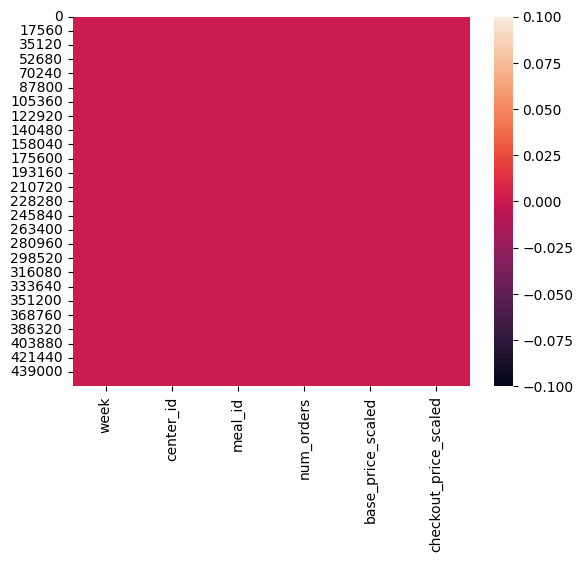

In [28]:
sns.heatmap(train.isnull())
plt.show()

<Axes: >

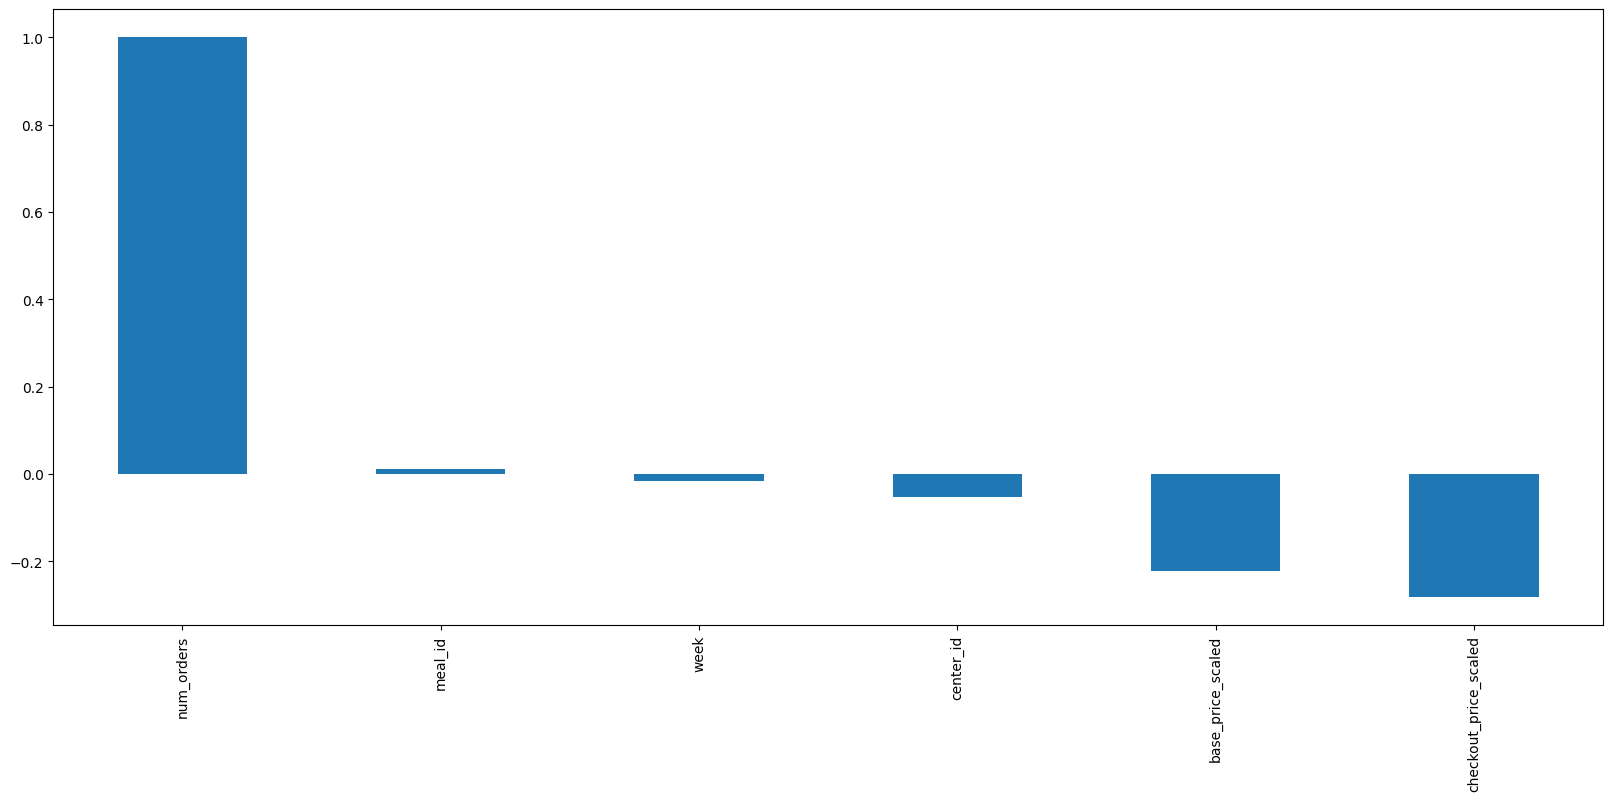

In [29]:
plt.figure(figsize=(20,8))
train.corr()['num_orders'].sort_values(ascending=False).plot(kind='bar')

In [30]:
train.head()

,week,center_id,meal_id,num_orders,base_price_scaled,checkout_price_scaled
0,1,55,1885,177,0.061610,0.065916
1,1,55,1993,270,0.045526,0.065916
2,1,55,2539,189,0.045555,0.064032
3,1,55,2139,54,0.340333,0.259725
4,1,55,2631,40,0.149759,0.167923


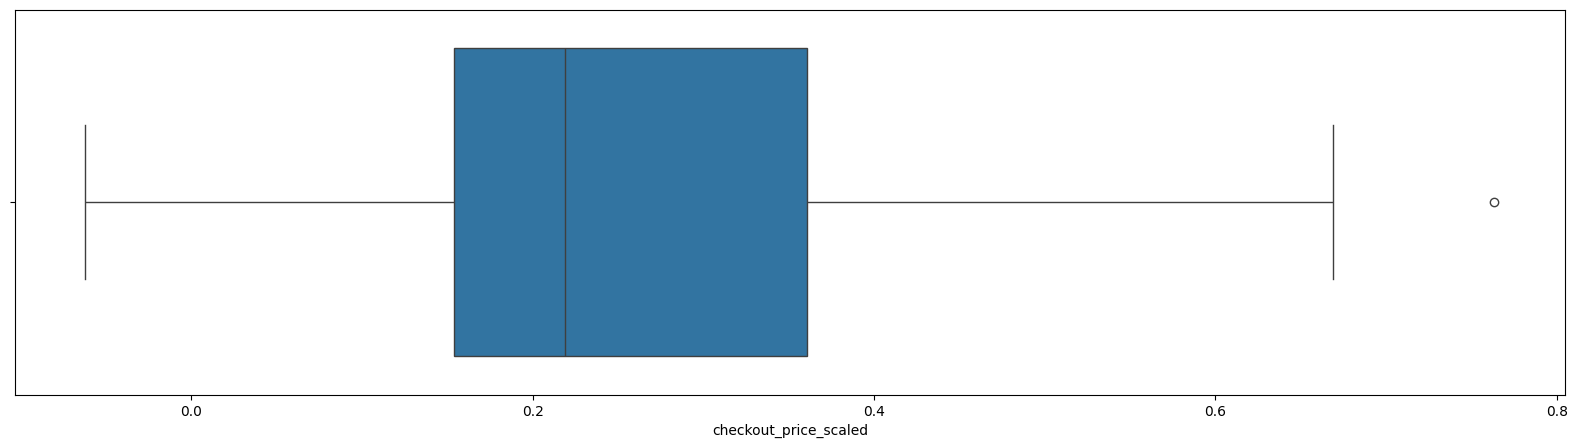

In [32]:
plt.figure(figsize=(20,5))
sns.boxplot(x = "checkout_price_scaled",data=train)
plt.show()

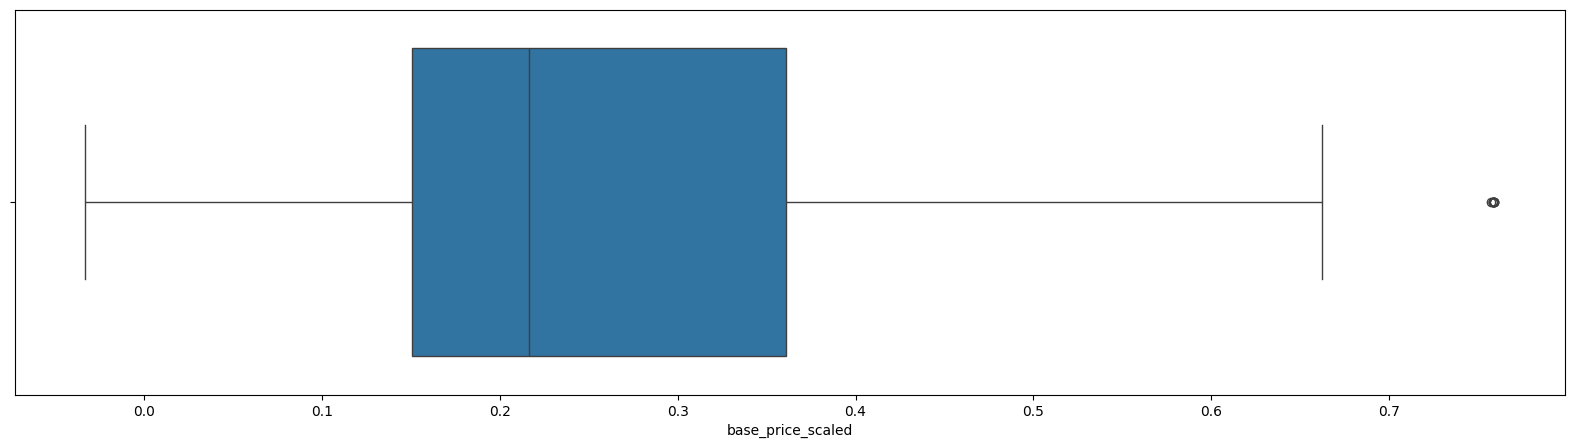

In [33]:
plt.figure(figsize=(20,5))
sns.boxplot(x = "base_price_scaled",data=train)
plt.show()

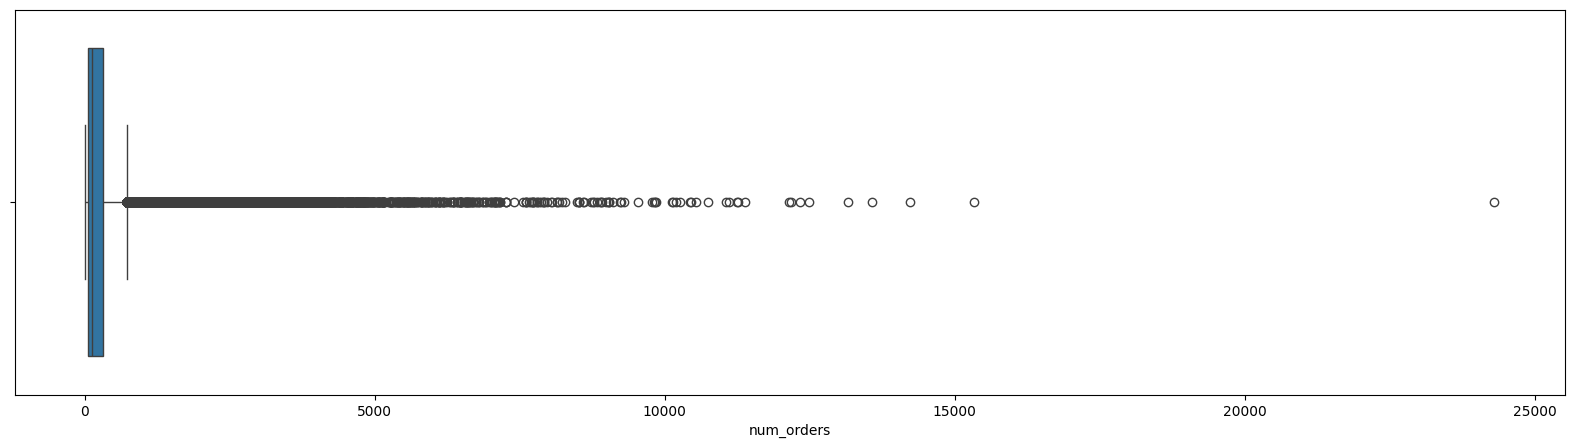

In [34]:
plt.figure(figsize=(20,5))
sns.boxplot(x = "num_orders",data=train)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2648\564086326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["num_orders"])


<Axes: xlabel='num_orders', ylabel='Density'>

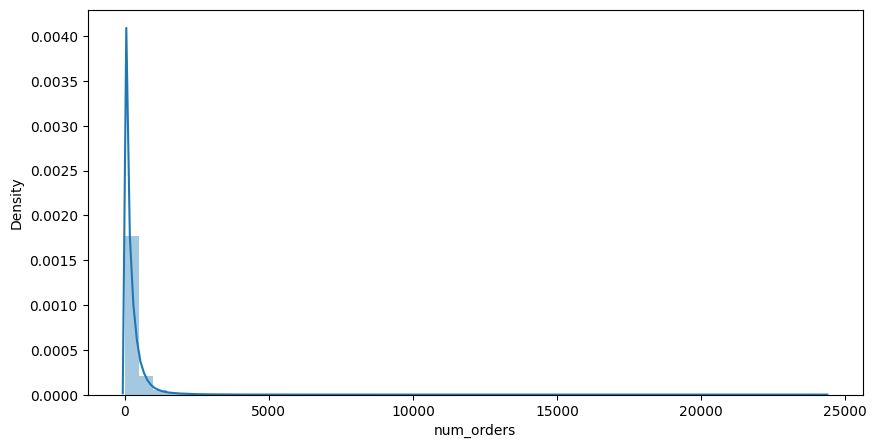

In [35]:
plt.figure(figsize=(10,5))
# plt.xlim(0,1500)
sns.distplot(train["num_orders"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2648\1950795140.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["num_orders"])


<Axes: xlabel='num_orders', ylabel='Density'>

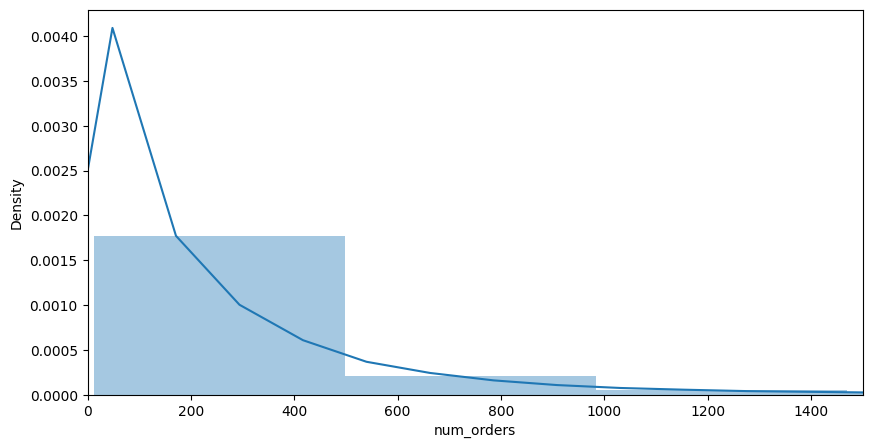

In [36]:
plt.figure(figsize=(10,5))
plt.xlim(0,1500)
sns.distplot(train["num_orders"])


In [37]:
# removing outliers using IQR method
q1 = train["num_orders"].quantile(0.25)
q3 = train["num_orders"].quantile(0.75)
iqr = q3 - q1

In [38]:
min_r = q1 - (1.5 * iqr)
max_r = q3 + (1.5 * iqr)
min_r,max_r

(-351.0, 729.0)

In [39]:
train.shape

(456548, 6)

In [40]:
train = train[train["num_orders"] <= max_r]

In [41]:
train.shape

(423611, 6)

In [42]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
week,423611.0,74.905678,41.588333,1.000000,39.000000,76.000000,111.000000,145.000000
center_id,423611.0,82.871221,45.809735,10.000000,50.000000,77.000000,110.000000,186.000000
meal_id,423611.0,2023.711821,550.908603,1062.000000,1543.000000,1993.000000,2569.000000,2956.000000
num_orders,423611.0,182.203016,169.519085,13.000000,53.000000,122.000000,270.000000,729.000000
base_price_scaled,423611.0,0.265695,0.157598,-0.033116,0.151713,0.222772,0.372560,0.759278
checkout_price_scaled,423611.0,0.260884,0.147095,-0.062091,0.166039,0.230970,0.361789,0.763464


C:\Users\Admin\AppData\Local\Temp\ipykernel_2648\3745191006.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["num_orders"])


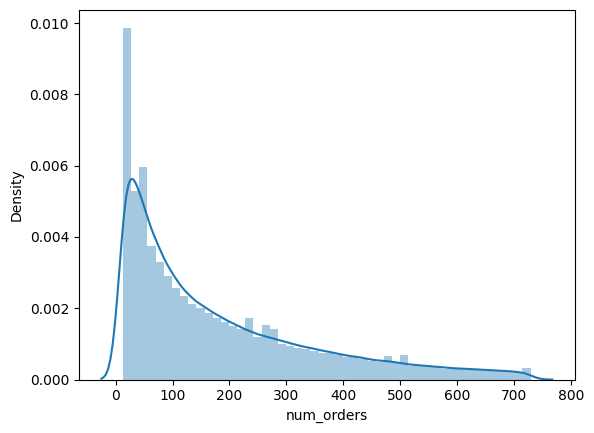

In [43]:
sns.distplot(train["num_orders"])
plt.show()

In [118]:
# from sklearn.preprocessing import FunctionTransformer

In [119]:
# ft = FunctionTransformer(func=np.log1p)

In [120]:
# ft.fit(train[["num_orders"]])

In [121]:
# train["num_orders_tf"] = ft.transform(train[["num_orders"]])

In [122]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# sns.distplot(train["num_orders"])
# plt.title("Before")

# plt.subplot(1,2,2)
# sns.distplot(train["num_orders_tf"])
# plt.title("After")

# plt.show()

In [44]:
# Separate features and target variable
X_train = train.drop(columns=['num_orders'])
y_train = train['num_orders']


In [45]:
# Features for test data (since there's no num_orders column)
# X_test = test

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [47]:
# Assuming 'num_orders' is the target variable
X = train.drop(columns=['num_orders'])  # Features
y = train['num_orders']  # Target variable

In [48]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = RandomForestRegressor(random_state=42)

In [50]:
train.head()

,week,center_id,meal_id,num_orders,base_price_scaled,checkout_price_scaled
0,1,55,1885,177,0.061610,0.065916
1,1,55,1993,270,0.045526,0.065916
2,1,55,2539,189,0.045555,0.064032
3,1,55,2139,54,0.340333,0.259725
4,1,55,2631,40,0.149759,0.167923


In [51]:
train.shape

(423611, 6)

In [52]:
test.head()

,week,center_id,meal_id,base_price_scaled,checkout_price_scaled
0,146,55,1885,0.068274,0.086266
1,146,55,1993,0.068274,0.088178
2,146,55,2539,0.068303,0.085338
3,146,55,2631,0.071117,0.090005
4,146,55,1248,0.072984,0.091831


In [53]:
# Example: Check column names
print(X_train.columns)
print(X_test.columns)

Index(['week', 'center_id', 'meal_id', 'base_price_scaled',
       'checkout_price_scaled'],
      dtype='object')
Index(['week', 'center_id', 'meal_id', 'base_price_scaled',
       'checkout_price_scaled'],
      dtype='object')


In [54]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [55]:
# Predict on test data
y_pred_test = model.predict(test)
y_pred_test

array([ 86.72,  83.56, 228.82, ..., 370.31, 307.6 , 232.47])

In [56]:
test.shape

(32573, 5)

In [57]:
y_pred_test.shape

(32573,)

In [58]:
# Use the score method to evaluate the model on test data
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score,test_score

(0.970952669122401, 0.7932844318044739)

In [59]:
print(f"Train R-squared: {train_score:.2f}")
print(f"Test R-squared: {test_score:.2f}")

Train R-squared: 0.97
Test R-squared: 0.79


In [139]:
def predict_num_orders(week, center_id, meal_id, checkout_price, base_price):

    input_data = pd.DataFrame({
        'week': [week],
        'center_id': [center_id],
        'meal_id': [meal_id],
        'checkout_price': [checkout_price],
        'base_price': [base_price]
    })

    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]


In [140]:
if __name__ == "__main__":
    week = int(input("Enter week: "))
    center_id = int(input("Enter center_id: "))
    meal_id = int(input("Enter meal_id: "))
    checkout_price = float(input("Enter checkout_price: "))
    base_price = float(input("Enter base_price: "))

    predicted_orders = predict_num_orders(week, center_id, meal_id, checkout_price, base_price)
    print(f"Predicted number of orders: {int(predicted_orders)}")


Predicted number of orders: 320
